# **CHESS PLAYER GAME**

Aroz Imran   21L-6246

Hashim Siddque 21L-6230

Muneeb Bhatti   21L-6257

In [1]:

!pip install python-chess



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00


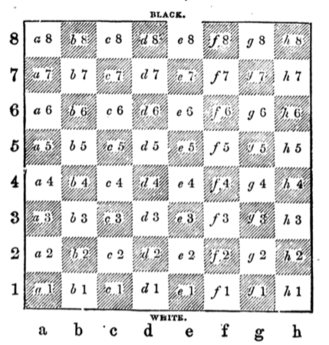

**Beginner**: A depth of 2-3 is usually enough. This depth allows the AI to
play simple but consistent moves without overwhelming a beginner.
**Intermediate**: Depths between 3-5 are suitable for players with some experience. This range offers more strategic play without excessive complexity.
**Advanced**: A depth of 5-7 provides a challenging experience for more skilled players.

In [6]:
import chess  # Import the chess library
import numpy as np  # Import numpy for handling infinities

# Basic piece values for evaluation
PIECE_VALUES = {
    chess.PAWN: 1,
    chess.KNIGHT: 3,
    chess.BISHOP: 3,
    chess.ROOK: 5,
    chess.QUEEN: 9,
    chess.KING: 1000,
}

# Basic evaluation function to assess the board's strength
def evaluate_board(board):
    score = 0
    for piece_type in PIECE_VALUES:
        score += len(board.pieces(piece_type, chess.WHITE)) * PIECE_VALUES[piece_type]
        score -= len(board.pieces(piece_type, chess.BLACK)) * PIECE_VALUES[piece_type]
    return score

# Minimax algorithm with Alpha-Beta pruning to find the optimal move
def minimax(board, depth, alpha, beta, maximizing):
    if depth == 0 or board.is_game_over():
        return evaluate_board(board), None

    best_move = None
    if maximizing:
        max_eval = -np.inf
        for move in board.legal_moves:
            board.push(move)
            eval, _ = minimax(board, depth - 1, alpha, beta, False)
            board.pop()

            if eval > max_eval:
                max_eval = eval
                best_move = move

            alpha = max(alpha, eval)
            if beta <= alpha:
                break

        return max_eval, best_move
    else:
        min_eval = np.inf
        for move in board.legal_moves:
            board.push(move)
            eval, _ = minimax(board, depth - 1, alpha, beta, True)
            board.pop()

            if eval < min_eval:
                min_eval = eval
                best_move = move

            beta = min(beta, eval)
            if beta <= alpha:
                break

        return min_eval, best_move
def print_board_with_boxes(board):
    CREAM_SQUARE = "\033[48;5;230m"  # Cream background for light squares
    LIGHT_BROWN_SQUARE = "\033[48;5;101m"  # Light brown background for dark squares
    BLACK_TEXT = "\033[30m"          # Black text color
    WHITE_TEXT = "\033[97m"          # White text color
    RESET = "\033[0m"                # Reset to default color

    # Loop through the ranks and files
    for rank in range(8, 0, -1):
        row = f"{rank} "  # Rank indicator
        for file in range(8):
            is_black_square = (file + rank) % 2 == 0  # Determine if it's a dark square
            if is_black_square:
                bg_color = LIGHT_BROWN_SQUARE
                text_color = WHITE_TEXT
            else:
                bg_color = CREAM_SQUARE
                text_color = BLACK_TEXT

            square = chess.square(file, rank - 1)
            piece = board.piece_at(square)

            # Piece symbol with appropriate text color and background color
            piece_char = piece.symbol() if piece else " "
            row += f"{bg_color}{text_color} {piece_char} {RESET}"

        print(row + f" {rank}")  # Complete the row and add the rank indicator

    # Print a horizontal border
    print("  " + "-" * (8 * 3))

    # File labels without background color
    file_labels = "   " + "  ".join([chr(ord('a') + i) for i in range(8)])  # Simple file labels
    print(file_labels)


# Modify your play_chess function to use print_board_with_boxes instead of print(board)
def play_chess():
    board = chess.Board()
    depth = int(input("Enter search depth for AI: "))

    while not board.is_game_over():
        print_board_with_boxes(board)

        if board.turn == chess.WHITE:
            # Human move
            move = input("Your move (in UCI format): ")
            if chess.Move.from_uci(move) in board.legal_moves:
                board.push_uci(move)
            else:
                print("Invalid move. Try again.")
        else:
            # AI move
            _, best_move = minimax(board, depth, -np.inf, np.inf, True)
            print(f"AI move: {best_move}")
            board.push(best_move)

    print("Game over!")
    if board.is_checkmate():
        winner = "White" if board.turn == chess.BLACK else "Black"
        print(f"{winner} wins by checkmate.")
    else:
        print("It's a draw.")
play_chess()

Enter search depth for AI: 3
8  r  n  b  q  k  b  n  r  8
7  p  p  p  p  p  p  p  p  7
6                          6
5                          5
4                          4
3                          3
2  P  P  P  P  P  P  P  P  2
1  R  N  B  Q  K  B  N  R  1
  ------------------------
   a  b  c  d  e  f  g  h
Your move (in UCI format): e2e4
8  r  n  b  q  k  b  n  r  8
7  p  p  p  p  p  p  p  p  7
6                          6
5                          5
4              P           4
3                          3
2  P  P  P  P     P  P  P  2
1  R  N  B  Q  K  B  N  R  1
  ------------------------
   a  b  c  d  e  f  g  h
AI move: g8h6
8  r  n  b  q  k  b     r  8
7  p  p  p  p  p  p  p  p  7
6                       n  6
5                          5
4              P           4
3                          3
2  P  P  P  P     P  P  P  2
1  R  N  B  Q  K  B  N  R  1
  ------------------------
   a  b  c  d  e  f  g  h
Your move (in UCI format): d2d4
8  r  n  b  q  k  b     r  8
7  p  p  